In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, cholesky
from scipy import io
import random

In [8]:
def get_sonar():
    return random.randint(0,100)

In [3]:
def mov_avg_filter(x_n,x_meas):
    "calculate average sonar using a moving average filter (batch expression)"
    n=len(x_n)
    for i in range(n-1):
        x_n[i]= x_n[i+1]
    x_n[n-1]=x_meas
    x_avg = np.mean(x_n)
    return x_avg,x_n

In [5]:
# input parametres 
n=10
n_sampless= 500
time_end= 10

In [6]:
dt = time_end/n_sampless
time  =np.arange(0,time_end,dt)
x_meas_save = np.zeros(n_sampless)
x_avg_save =np.zeros(n_sampless)

In [10]:
for i in range(n_sampless):
    x_meas = get_sonar()
    if i == 0:
        x_avg,x_n = x_meas,x_meas*np.ones(n)
    else :
        x_avg, x_n = mov_avg_filter(x_n=x_n,x_meas=x_meas)
    
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

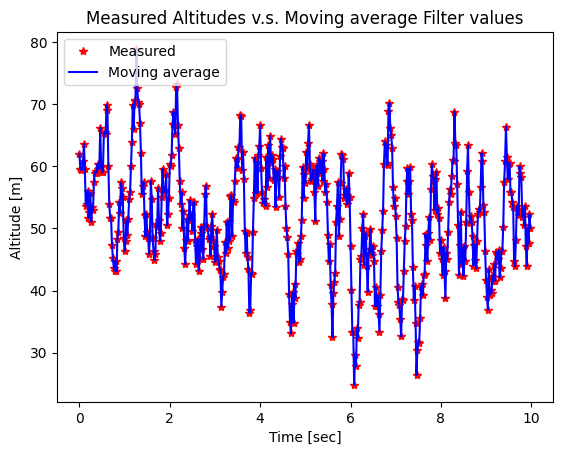

In [11]:
plt.plot(time,x_avg_save,"r*",label="Measured")
plt.plot(time,x_avg_save,"b-",label="Moving average")
plt.legend(loc="upper left")
plt.title("Measured Altitudes v.s. Moving average Filter values")
plt.xlabel("Time [sec]")
plt.ylabel("Altitude [m]")
plt.savefig("png/moving_average_filter.png")
